# U.S. Geological Survey Class GW3099
Advanced Modeling of Groundwater Flow (GW3099)\
Boise, Idaho\
September 16 - 20, 2024

![title](../../images/ClassLocation.jpg)

# Paraview Example 1 -- Exporting to VTK

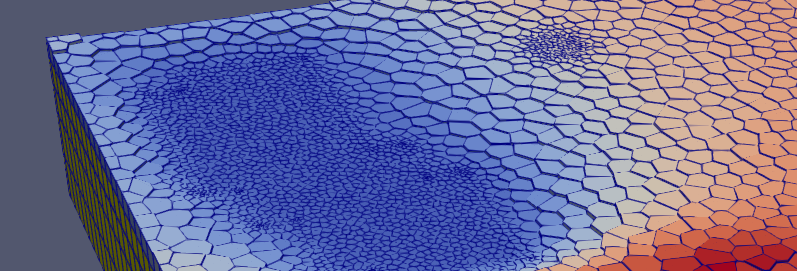

In [ ]:
# imports
%matplotlib inline
import flopy
import matplotlib.pyplot as plt
import numpy as np
import synthetic_valley

## Create and Run Synthetic Valley Model

In [ ]:
# get and run flow and transport models
silent = True
sim_gwf = synthetic_valley.get_mf6gwf_sim(
    lake_concentration=1.0, recharge_concentration=0.0
)
sim_gwf.write_simulation(silent=silent)
sim_gwf.run_simulation(silent=silent)

sim_gwt = synthetic_valley.get_mf6gwt_sim(initial_concentration=0.0)
sim_gwt.write_simulation(silent=silent)
sim_gwt.run_simulation(silent=silent)

## Export Discretization to VTK

In [ ]:
# create variables for gwf, gwt, and the modelgrid
gwf = sim_gwf.flow
gwt = sim_gwt.trans
modelgrid = gwt.modelgrid
modelgrid.plot()

In [ ]:
# export this disv package to vtk
gwf.disv.export("./vtk", fmt="vtk")

## Export Grid-Sized Array to VTK

In [ ]:
# show how to export a grid-sized array to vtk
vtk = flopy.export.vtk.Vtk(modelgrid=modelgrid)
nlay, ncpl = modelgrid.nlay, modelgrid.ncpl
ilay = np.zeros((nlay, ncpl), dtype=int)
for k in range(nlay):
    ilay[k] = k
vtk.add_array(ilay, "ilay")
vtk.write("./vtk/ilay")

## Export Concentrations to VTK

In [ ]:
# export a sequence of concentration vtk files
vtk = flopy.export.vtk.Vtk(
    modelgrid=modelgrid, pvd=True, xml=True, binary=True
)
vtk.add_heads(gwt.output.concentration())
vtk.write("./vtk/concentration")

## Start Paraview

Things to do in paraview

* load and view the discretization vtk file
* load and view the ilay vtu file
* save the state as a python file
* load the state as a python file* load the concentration pvu file
* filters (clip, transform, )
* export animation
